In [1]:
import numpy as np
import matplotlib.pyplot as plt
import time

from tqdm import trange

In [2]:
def weiszfeld(a_i,v_i,tol):
    #STEP 1
    #checking if the minimum is attained at an exisiting location
    for k in range(np.shape(a_i)[0]):
        #this is a sum, and we know that a_k - a_k = 0 
        #in order to increase efficiency of algorithm
        #we make a list and use np.sum to sum it up     
        #firstly removing the k'th element
        vi_without_k = np.delete(v_i,k)
        ai_without_k = np.delete(a_i,k,axis=0)
        #computing the distance and the upper part of the fractions
        #this is just to simplify the equation, in order to ensure that every separate part is done correctly
        dist = np.sqrt((ai_without_k[:,0]-a_i[k,0])**2+(ai_without_k[:,1]-a_i[k,1])**2) 
        first_vals = vi_without_k * (a_i[k,0] - ai_without_k[:,0])
        sec_vals = vi_without_k * (a_i[k,1] - ai_without_k[:,1])       
        #calculating the test_k
        test_k = np.sqrt(np.sum(first_vals/dist)**2 + np.sum(sec_vals/dist)**2)
        #checking whether test_k fulfills our requirement
        if test_k <= v_i[k]:
            #setting x* to a^k and returning this value
            #this is because: if this is fulfilled, it means we already have the minimum
            return a_i[k]
    #STEP 2
    #Choosing a starting point x = (x1,x2)
    #this starting point can be found by solving the median problem using squared Euclidean norm
    #choosing origo for simplicity's sake, will change when I understand how to solve the median problem??
    starting_point = (1/np.shape(a_i)[0])*np.array([np.sum(a_i[:,0]),np.sum(a_i[:,1])])
    x = (1/np.shape(a_i)[0])*np.array([np.sum(a_i[:,0]),np.sum(a_i[:,1])])
    
    
    #actually I think the most rational thing is to choose the point that gave the lowest test_k from step 1
    #however will implement when I know more regarding this
    #the thing is that it shouldn't be a point that is within a_i. that doesn't really make sense
    #because then things will go to infinity when we sammenligner with other points
    #STEP 3 AND 4 COMBINED
    #initializing x_new
    x_new = x
    f_old = np.sum(v_i*np.sqrt((a_i[:,0]-x[0])**2+(a_i[:,1]-x[1])**2))
    #setting a random value for f_new
    f_new = 1000
    i=0
    err_lst = np.zeros(300)
    #setting a stopping criterion. i dont want to run too many iterations
    #so also setting a criterion for max amt of iterations
    while (i<300) and (abs((f_new-f_old)/(f_new)))>tol:
        f_old = np.sum(v_i*np.sqrt((a_i[:,0]-x[0])**2+(a_i[:,1]-x[1])**2))
        x = x_new
        lower = v_i/np.sqrt((a_i[:,0]-x[0])**2+(a_i[:,1]-x[1])**2)
        x1s = lower*a_i[:,0]/np.sum(lower)
        x2s = lower*a_i[:,1]/np.sum(lower)
        x_new = np.array([np.sum(x1s),np.sum(x2s)])
        #writing the problem for the stopping criterion
        f_new = np.sum(v_i*np.sqrt((a_i[:,0]-x_new[0])**2+(a_i[:,1]-x_new[1])**2))
        err_lst[i] = (abs((f_new-f_old)/(f_new)))
        i+=1
    return x_new, err_lst[err_lst != 0]
        


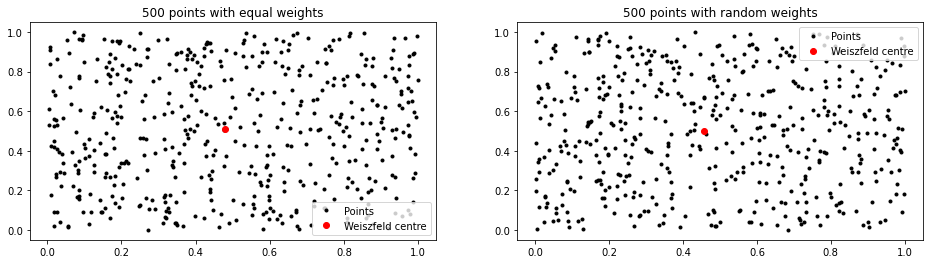

In [3]:
#Making convergence plots
#Firstly using an example where all points have the same weights
a_is = np.random.random((500,2))
#a_is = np.append(a_is,[[1,1]],axis=0)

v_i = np.ones(np.shape(a_is)[0])
#v_i[-1]=20
tol = 1e-5


vals_w, errs_w = weiszfeld(a_is, v_i, tol)

a_is_rand = np.random.random((500,2))
v_i_rand = np.random.randint(low=0,high=400,size = np.shape(a_is)[0])
tol = 1e-5


vals_w_rand, errs_w_rand= weiszfeld(a_is_rand, v_i_rand, tol)


plt.figure(figsize =(16,4))
plt.subplot(1,2,1)
plt.title("500 points with equal weights")
plt.plot(a_is[:,0], a_is[:,1], ".k", label="Points")
plt.plot(vals_w[0], vals_w[1], "or", label="Weiszfeld centre")
plt.legend()
plt.subplot(1,2,2)
plt.title("500 points with random weights")
plt.plot(a_is_rand[:,0], a_is_rand[:,1], ".k", label="Points")
plt.plot(vals_w_rand[0], vals_w_rand[1], "or", label="Weiszfeld centre")
#plt.plot(start_rand[0], start_rand[1], "ob", label="Starting point")
plt.legend()
plt.savefig('weiszfeld.png')
plt.show()

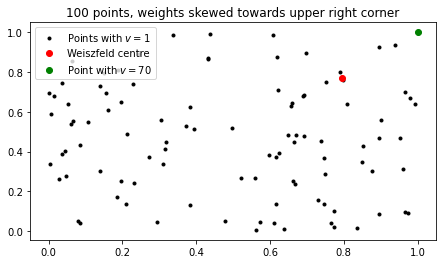

In [5]:
#Making convergence plots
#Firstly using an example where all points have the same weights
a_is = np.random.random((99,2))
a_is = np.append(a_is,[[1,1]],axis=0)

v_i = np.ones(np.shape(a_is)[0])
v_i[-1]=70
tol = 1e-5


vals_w, errs_w = weiszfeld(a_is, v_i, tol)



plt.figure(figsize =(16,4))
plt.subplot(1,2,1)
plt.title("100 points, weights skewed towards upper right corner")
plt.plot(a_is[:,0], a_is[:,1], ".k", label="Points with $v=1$")
plt.plot(vals_w[0], vals_w[1], "or", label="Weiszfeld centre")
#plt.plot(start[0], start[1], "ob", label="Starting point")
plt.plot(1,1,"og",label="Point with $v=70$")
plt.legend(loc=2)
plt.savefig('weiszfeld_skewed.png', bbox_inches='tight')

In [6]:
#Gradient descent with backtracking


#function
def f(x, a_i, v_i):    
    return np.sum(v_i*np.sqrt((a_i[:,0]-x[0])**2+(a_i[:,1]-x[1])**2))

#gradient
def grad(x, a_i, v_i):
    lower = np.sqrt((a_i[:,0]-x[0])**2+(a_i[:,1]-x[1])**2)
    dx1 = np.sum(v_i*(x[0]-a_i[:,0])/lower)
    dx2 = np.sum(v_i*(x[1]-a_i[:,1])/lower)
    return(np.array([dx1,dx2]))


def alfa(x, a_i, v_i, p_k):
    #can tweak alpha, c and rho according to problem
    alpha = 1
    c=1/4
    rho=1/2
    m = grad(x, a_i, v_i)@p_k
    #making sure that alpha obeys the wolfe conditions
    while f(x+alpha*p_k,a_i,v_i) > f(x,a_i,v_i)+c*alpha*m:
        alpha = rho*alpha
    return alpha


def grad_descent(a_i,v_i,tol):
    #STEP 1
    #checking if the minimum is attained at an exisiting location
    for k in range(np.shape(a_i)[0]):
        vi_without_k = np.delete(v_i,k)
        ai_without_k = np.delete(a_i,k,axis=0)
        dist = np.sqrt((ai_without_k[:,0]-a_i[k,0])**2+(ai_without_k[:,1]-a_i[k,1])**2) 
        first_vals = vi_without_k * (a_i[k,0] - ai_without_k[:,0])
        sec_vals = vi_without_k * (a_i[k,1] - ai_without_k[:,1])
        test_k = np.sqrt(np.sum(first_vals/dist)**2 + np.sum(sec_vals/dist)**2)
        if test_k <= v_i[k]:
            return a_i[k]
    #STEP 2
    x = (1/np.shape(a_i)[0]) * np.array([np.sum(a_i[:,0]),np.sum(a_i[:,1])])
    #STEP 3 AND 4 COMBINED
    x_new = x
    f_old = f(x, a_i, v_i)  
    f_new = 1000
    i=0   
    err_lst = np.zeros(300)
    #not sure what tolerance we should set, need to talk to Daria
    #seems as if gradient descent is based on another tolerance type
    #while (i<300) and (abs((f_new-f_old)/(f_old)))>tol:
    while (i<300) and (abs((f_new-f_old)/(f_new))>tol):

        #updating x and f_old
        x = x_new
        f_old = f(x, a_i, v_i)        
        #the direction of the steepest descent is the negative gradient of x_k
        p_k= -grad(x, a_i, v_i)
        #armijo backtracking
        alpha = alfa(x, a_i, v_i, p_k)
        #updating x with alpha and direction
        x_new = x + alpha*p_k
        f_new = f(x_new, a_i, v_i)
        err_lst[i] = (abs((f_new-f_old)/(f_new)))
        i+=1
    return x_new, err_lst[err_lst != 0]


Time taken, gradient descent:  1.8478913307189941
Time taken, Weiszfeld : 1.7669110298156738


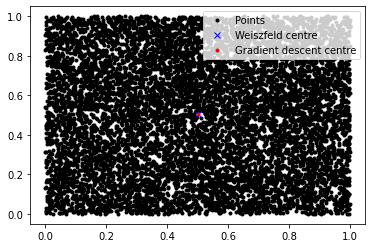

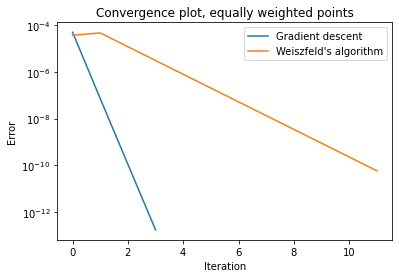

In [41]:
#Making convergence plots
#Firstly using an example where all points have the same weights


In [7]:
#Making convergence plots
#Firstly using an example where all points have the same weights
a_is = np.random.random((10000,2))
v_i = np.random.randint(low=0,high=1000,size = np.shape(a_is)[0])
tol = 1e-10

vals_g_rand, errs_g_rand = grad_descent(a_is,v_i,tol)
vals_w_rand, errs_w_rand = weiszfeld(a_is, v_i, tol)

a_is = np.random.random((10000,2))
v_i = np.ones(np.shape(a_is)[0])

vals_g, errs_g = grad_descent(a_is,v_i,tol)
vals_w, errs_w = weiszfeld(a_is, v_i, tol)



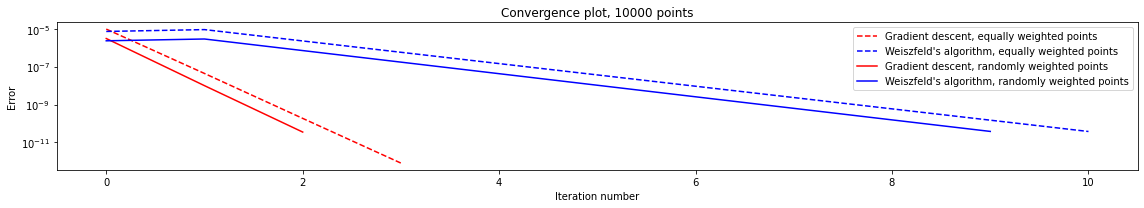

In [29]:
plt.figure(figsize=(16,5))
plt.semilogy(errs_g,"--r", label="Gradient descent, equally weighted points")
plt.semilogy(errs_w, "--b", label="Weiszfeld's algorithm, equally weighted points")
plt.semilogy(errs_g_rand, "r", label="Gradient descent, randomly weighted points")
plt.semilogy(errs_w_rand, "b", label="Weiszfeld's algorithm, randomly weighted points")
plt.ylabel("Error")
plt.xlabel("Iteration number")
plt.title("Convergence plot, 10000 points")
plt.tight_layout()
plt.legend()
plt.savefig('convplot.png', bbox_inches="tight")
plt.show()

In [8]:
#Next: Checking the timestamps
tol=1e-6
tens = 10**(np.linspace(1,4,4))
timestamp_w_rand = np.zeros(len(tens))
timestamp_w = np.zeros(len(tens))
timestamp_g_rand = np.zeros(len(tens))
timestamp_g = np.zeros(len(tens))

for j in range(3):
    for i in trange(len(tens)):
        #trying with both random and equal weights
        a_is = np.random.random((np.int(tens[i]),2))
        v_i_rand = np.random.randint(low=0,high=tens[i],size = np.shape(a_is)[0])
        v_i = np.ones(np.shape(a_is)[0])

        t=time.time()
        vals_g, errs_g = grad_descent(a_is,v_i,tol)
        timestamp_g[i] += time.time()-t

        t=time.time()
        vals_w, errs_w = weiszfeld(a_is, v_i, tol)
        timestamp_w[i] += time.time()-t

        t=time.time()
        vals_g, errs_g = grad_descent(a_is,v_i_rand,tol)
        timestamp_g_rand[i] += time.time()-t

        t=time.time()
        vals_w, errs_w = weiszfeld(a_is, v_i_rand, tol)
        timestamp_w_rand[i] += time.time()-t
timestamp_g=timestamp_g/3
timestamp_g=timestamp_w/3
timestamp_g=timestamp_g_rand/3
timestamp_g=timestamp_w_rand/3

100%|██████████| 4/4 [00:15<00:00,  3.96s/it]


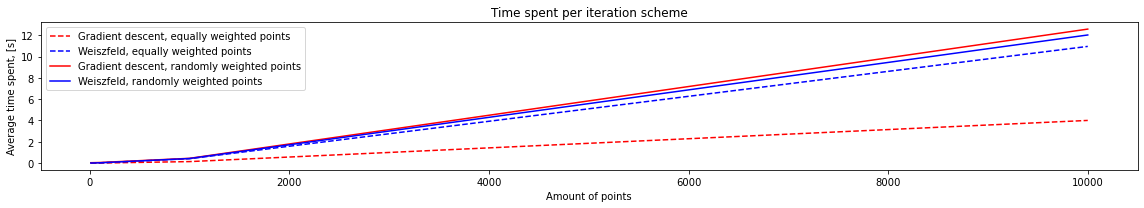

[0.0044837  0.01071994 0.14517482 4.00685755]
[ 0.02256298  0.03082132  0.41731191 10.94886255]
[ 0.04091096  0.06046057  0.4521544  12.57175183]
[ 0.0134511   0.03215981  0.43552446 12.02057266]


In [9]:
plt.figure(figsize = (16,3))
plt.title("Time spent per iteration scheme")
plt.plot(tens,timestamp_g,"--r",label="Gradient descent, equally weighted points")
plt.plot(tens,timestamp_w,"--b",label="Weiszfeld, equally weighted points")
plt.plot(tens,timestamp_g_rand,"-r",label="Gradient descent, randomly weighted points")
plt.plot(tens,timestamp_w_rand,"-b",label="Weiszfeld, randomly weighted points")
plt.xlabel("Amount of points")
plt.ylabel("Average time spent, [s]")
plt.tight_layout()
plt.legend()
plt.savefig('time_iteration',bbox_inches="tight")
plt.show()

print(timestamp_g)
print(timestamp_w)
print(timestamp_g_rand)
print(timestamp_w_rand)

In [10]:
def weiszfeld_x(a_i,v_i,tol):
    #STEP 1
    #checking if the minimum is attained at an exisiting location
    for k in range(np.shape(a_i)[0]):
        #firstly removing the k'th element
        vi_without_k = np.delete(v_i,k)
        ai_without_k = np.delete(a_i,k,axis=0)
        #computing the distance and the upper part of the fractions
        #this is just to simplify the equation, in order to ensure that every separate part is done correctly
        dist = np.sqrt((ai_without_k[:,0]-a_i[k,0])**2+(ai_without_k[:,1]-a_i[k,1])**2) 
        first_vals = vi_without_k * (a_i[k,0] - ai_without_k[:,0])
        sec_vals = vi_without_k * (a_i[k,1] - ai_without_k[:,1])
        #calculating the test_k
        test_k = np.sqrt(np.sum(first_vals/dist)**2 + np.sum(sec_vals/dist)**2)
        #checking whether test_k fulfills our requirement
        if test_k <= v_i[k]:
            #setting x* to a^k and returning this value
            #this is because: if this is fulfilled, it means we already have the minimum
            return a_i[k]
    x_new = (1/np.shape(a_i)[0])*np.array([np.sum(a_i[:,0]),np.sum(a_i[:,1])])
    x=np.array([100,100])
    f_old = np.sum(v_i*np.sqrt((a_i[:,0]-x[0])**2+(a_i[:,1]-x[1])**2))
    #setting a random value for f_new
    f_new = np.array([100,100])
    i=0
    err_lst = np.zeros(300)
    #setting a stopping criterion. i dont want to run too many iterations
    #so also setting a criterion for max amt of iterations
    while (i<300) and (abs(np.linalg.norm(x_new - x)/np.linalg.norm(x)))>tol:
        f_old = np.sum(v_i*np.sqrt((a_i[:,0]-x[0])**2+(a_i[:,1]-x[1])**2))
        x = x_new
        lower = v_i/np.sqrt((a_i[:,0]-x[0])**2+(a_i[:,1]-x[1])**2)
        x1s = lower*a_i[:,0]/np.sum(lower)
        x2s = lower*a_i[:,1]/np.sum(lower)
        x_new = np.array([np.sum(x1s),np.sum(x2s)])
        #writing the problem for the stopping criterion
        f_new = np.sum(v_i*np.sqrt((a_i[:,0]-x_new[0])**2+(a_i[:,1]-x_new[1])**2))
        err_lst[i] = (abs(np.linalg.norm(x_new-x)/np.linalg.norm(x)))
        i+=1
    return x_new, err_lst[err_lst != 0]

def grad_descent_x(a_i,v_i,tol):
    #STEP 1
    #checking if the minimum is attained at an exisiting location
    for k in range(np.shape(a_i)[0]):
        vi_without_k = np.delete(v_i,k)
        ai_without_k = np.delete(a_i,k,axis=0)
        dist = np.sqrt((ai_without_k[:,0]-a_i[k,0])**2+(ai_without_k[:,1]-a_i[k,1])**2) 
        first_vals = vi_without_k * (a_i[k,0] - ai_without_k[:,0])
        sec_vals = vi_without_k * (a_i[k,1] - ai_without_k[:,1])
        test_k = np.sqrt(np.sum(first_vals/dist)**2 + np.sum(sec_vals/dist)**2)
        if test_k <= v_i[k]:
            return a_i[k]
    #STEP 2
    x_new = (1/np.shape(a_i)[0]) * np.array([np.sum(a_i[:,0]),np.sum(a_i[:,1])])
    #STEP 3 AND 4 COMBINED
    x = np.array([100,100])
    f_old = f(x, a_i, v_i)  
    f_new = 1000
    i=0   
    err_lst = np.zeros(300)
    #not sure what tolerance we should set, need to talk to Daria
    #seems as if gradient descent is based on another tolerance type
    #while (i<300) and (abs((f_new-f_old)/(f_old)))>tol:
    while (i<300) and (abs(np.linalg.norm(x_new-x)/np.linalg.norm(x))>tol):
        #updating x and f_old
        x = x_new
        f_old = f(x, a_i, v_i)        
        #the direction of the steepest descent is the negative gradient of x_k
        p_k= -grad(x, a_i, v_i)
        #armijo backtracking
        alpha = alfa(x, a_i, v_i, p_k)
        #updating x with alpha and direction
        x_new = x + alpha*p_k
        f_new = f(x_new, a_i, v_i)
        err_lst[i] = (abs(np.linalg.norm(x_new-x_old)/(x)))
        i+=1
    return x_new, err_lst[err_lst != 0]



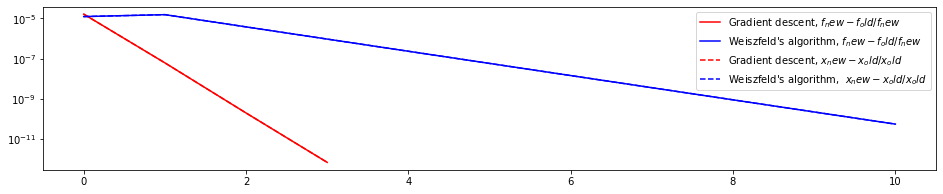

In [11]:
#Now we make a plot for why we use the chosen tolerance instead of x_old-x_new/x_old
#we want to compare the different stopping tolerances

a_is = np.random.random((10000,2))
v_i = np.random.randint(low = 0, high = 1000, size= np.shape(a_is)[0])
tol=1e-10

vals_g, errs_g = grad_descent(a_is,v_i,tol)
vals_w, errs_w = weiszfeld(a_is, v_i, tol)
vals_g_x, errs_g_x = grad_descent(a_is,v_i,tol)
vals_w_x, errs_w_x = weiszfeld(a_is, v_i, tol)



plt.figure(figsize=(16,3))
plt.semilogy(errs_g,"r", label="Gradient descent, $f_new-f_old/f_new$")
plt.semilogy(errs_w, "b", label="Weiszfeld's algorithm, $f_new-f_old/f_new$")
plt.semilogy(errs_g_x,"--r", label="Gradient descent, $x_new-x_old/x_old$")
plt.semilogy(errs_w_x, "--b", label="Weiszfeld's algorithm,  $x_new-x_old/x_old$")
plt.legend()
plt.show()